In [1]:
import aimodelshare as ai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
# Download competition training data and X_test data to working directory and train model
# Data description: Training and test data stored in csv files.
# ai.download_data("public.ecr.aws/y2e2a1d6/clickbait_competition_data-repository:latest")
# ai.download_data("public.ecr.aws/y2e2a1d6/clickbait_quickstart-repository:latest")
#X_train, X_test, y_train_labels, y_test_labels, example_data, lstm_model, lstm_model2 = ai.import_quickstart_data("clickbait")
    # add by abel
#quickstart_repository = 'quickstart_clickbait_materials-repository'
#ai.download_data("public.ecr.aws/y2e2a1d6/quickstart_clickbait_materials-repository:latest")


######################################################################
# there is bug in ai.import_quickstart_data, so I split data myself
# X_train, X_test, y_train_labels, y_test_labels, example_data, lstm_model, lstm_model2 = ai.import_quickstart_data("clickbait")

from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv("quickstart_clickbait_materials/clickbait_data.csv")

y = np.array(data['clickbait'])

X_text_train = np.array(data["headline"])
vect = CountVectorizer().fit(X_text_train)
X = vect.transform(X_text_train)

# create data directory for competition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2)


In [2]:
print(X_train.shape)

(24000, 22761)


In [3]:
print(y_train[0:5])

[1 1 0 1 1]


In [4]:
print('The 1st model I choose to use simple logistic regression model')
print('-'*40)
log = LogisticRegression().fit(X_train, y_train)
log_pred = log.predict(X_test)

print("Test set score: {:.2f}".format(log.score(X_test, y_test)))
print("CV Test Score: {:.2f}".format( np.mean(cross_val_score(log, X_test, y_test, cv=10))) )
print("CV F1 Score: {:.2f}".format(np.mean(cross_val_score(log, X_test, y_test, cv=10, scoring = "f1_weighted"))) )

The 1st model I choose to use simple logistic regression model
----------------------------------------
Test set score: 0.97
CV Test Score: 0.96
CV F1 Score: 0.96


In [5]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: ", grid.best_params_)

penal_log_reg = LogisticRegression(C = grid.best_params_["C"]).fit(X_train, y_train)
print("CV F1 Score: {:.2f}".format(np.mean(cross_val_score(penal_log_reg, X_test, y_test, cv=10, scoring = "f1_weighted"))) )


/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Best cross-validation score: 0.97
Test score: 0.97
Best parameters:  {'C': 10}


/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CV F1 Score: 0.96


/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


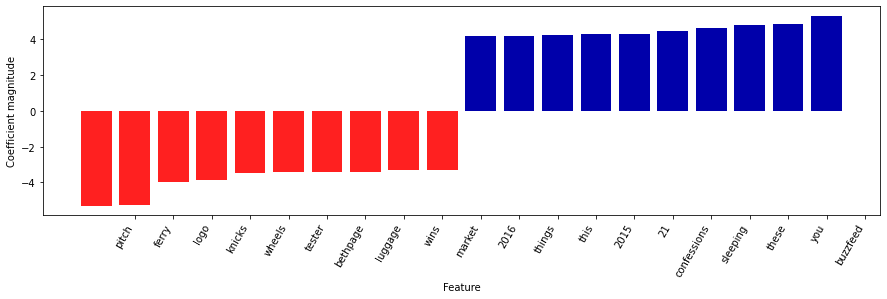

In [6]:
coefs = LogisticRegression(C = grid.best_params_["C"] ).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()

# the function is from Text analysis with sklearn.ipynb of week11
# helper function to plot top positive and negative coefficients

def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

visualize_coefficients(coefs, feature_names, n_top_features= 10)

In [7]:
print('try 2nd: Tree model')
print('-'*40)
from sklearn.tree import DecisionTreeClassifier

tree_basic = DecisionTreeClassifier().fit(X_train, y_train)

print("Test set score: {:.3f}".format(tree_basic.score(X_test, y_test)))
print("CV Test Score: {:.2f}".format(np.mean(cross_val_score(tree_basic, X_test, y_test, cv=10))) )
print("CV F1 Score: {:.2f}".format(np.mean(cross_val_score(tree_basic, X_test, y_test, cv=10, scoring = "f1_weighted"))) )

try 2nd: Tree model
----------------------------------------
Test set score: 0.929
CV Test Score: 0.92
CV F1 Score: 0.91


In [8]:
print('Use bagging Classifier to refine its predictions')
print('-'*40)
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
tree_bag = BaggingClassifier(tree, n_estimators=50, random_state=1).fit(X_train, y_train)

print("Test set score: {:.3f}".format(tree_bag.score(X_test, y_test)))
print("CV Test Score: {:.2f}".format(np.mean(cross_val_score(tree_bag, X_test, y_test, cv=10))) )
print("CV F1 Score: {:.2f}".format(np.mean(cross_val_score(tree_bag, X_test, y_test, cv=10, scoring = "f1_weighted"))) )

Use bagging Classifier to refine its predictions
----------------------------------------
Test set score: 0.935
CV Test Score: 0.93
CV F1 Score: 0.93


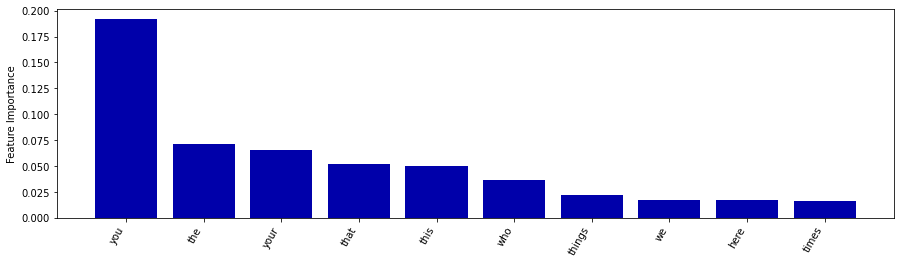

In [9]:
top_ten = np.argsort(-tree_basic.feature_importances_)[:10] #the index of the top 10 most important features
key_tree_coef = tree_basic.feature_importances_[top_ten] #the coefficients of the top 10 most important features 
names = [vect.get_feature_names()[np.argsort(-tree_basic.feature_importances_)[i]] for i in range(0,10)] 
#the feature names associated with the top 10 features

#the plot
plt.figure(figsize=(15, 5)) #size
plt.bar(np.arange(len(key_tree_coef)), key_tree_coef, color = '#0000aa')
plt.subplots_adjust(bottom=0.3)
plt.xticks(np.arange(0, len(key_tree_coef)), names, rotation=60,   ha="right")
plt.ylabel("Feature Importance")
plt.show() 

In [10]:
print('add minimum occurences')
vect = CountVectorizer(min_df = 10, stop_words="english").fit(X_text_train)
X = vect.transform(X_text_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

print('do it again:')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))
print("CV F1 Score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(C = grid.best_params_["C"]).fit(X_train, y_train), X_test, y_test, cv=10, scoring = "f1_weighted"))) )

add minimum occurences
do it again:


/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Best cross-validation score: 0.94
Test score: 0.95
CV F1 Score: 0.93


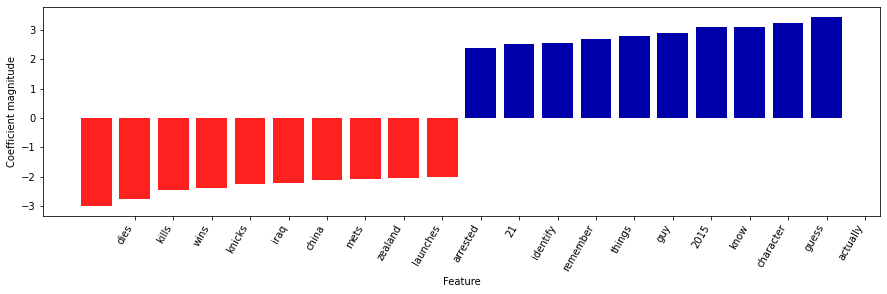

In [11]:
coefs = LogisticRegression(C = grid.best_params_["C"] ).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()
visualize_coefficients(coefs, feature_names, n_top_features= 10)

In [12]:
print('delete stop words')
vect = CountVectorizer(min_df = 10, stop_words="english").fit(X_text_train)
X = vect.transform(X_text_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2)
print('do it again 2:')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
log_restr = LogisticRegression(C = grid.best_params_["C"]).fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))
print("CV F1 Score: {:.2f}".format(np.mean(cross_val_score(log_restr, X_test, y_test, cv=10, scoring = "f1_weighted"))) )

delete stop words
do it again 2:


/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Best cross-validation score: 0.94
Test score: 0.95
CV F1 Score: 0.93


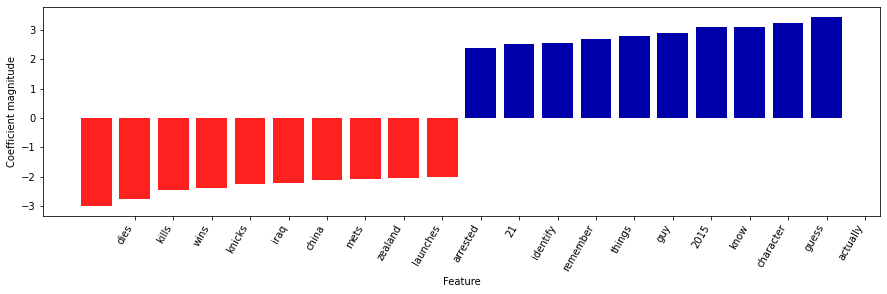

In [13]:
coefs = LogisticRegression(C = grid.best_params_["C"] ).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()
visualize_coefficients(coefs, feature_names, n_top_features= 10)

In [14]:
print('rescaling')
vect = TfidfVectorizer(min_df = 10, norm = None).fit(X_text_train)
X = vect.transform(X_text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
log_restr = LogisticRegression(C = grid.best_params_["C"]).fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))
print("CV F1 Score: {:.2f}".format(np.mean(cross_val_score(log_restr, X_test, y_test, cv=10, scoring = "f1_weighted"))) )

rescaling


/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Best cross-validation score: 0.97
Test score: 0.97
CV F1 Score: 0.96


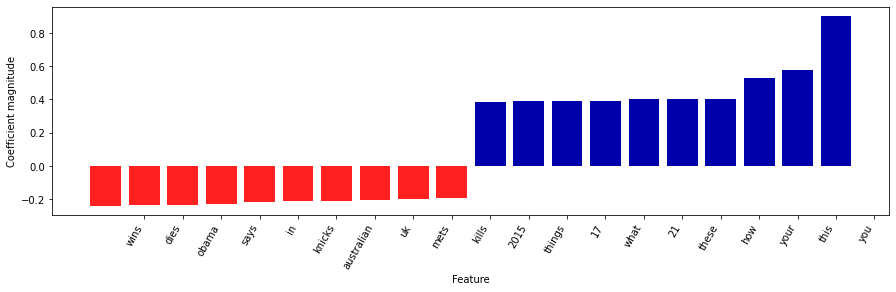

In [15]:
coefs = LogisticRegression(C = grid.best_params_["C"] ).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()
visualize_coefficients(coefs, feature_names, n_top_features= 10)

In [16]:
print('using test dataset')
X_true_test = vect.transform(np.array(data["headline"])) 
Y_true_test = np.array(data["clickbait"])

grid.fit(X_train, y_train)
log_restr = LogisticRegression(C = grid.best_params_["C"]).fit(X_train, y_train)


print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))
print("CV F1 Score: {:.2f}".format(np.mean(cross_val_score(log_restr, X_test, y_test, cv=10, scoring = "f1_weighted"))) )


using test dataset


/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/greatabel/.virtualenvs/samaritan0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Best cross-validation score: 0.97
Test score: 0.97
CV F1 Score: 0.96


In [17]:
print('-'*40, 'partII keras with iris', '-'*40)
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

from sklearn.preprocessing import LabelEncoder
np.random.seed(3) 

data = pd.read_csv("data/iris.csv" , encoding="latin_1")
data = data.iloc[:, 1:]
data.head(5)


---------------------------------------- partII keras with iris ----------------------------------------


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
y = LabelEncoder().fit_transform(data['Species'])
X = data.loc[:, data.columns != 'Species'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2)


In [19]:
def model_init(neurons1 = 20, neurons2 = 8): 
    model = Sequential()
    model.add(Dense(neurons1, input_dim = X_train.shape[1], activation='relu'))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = model_init, epochs=200, verbose=0)

param_grid = dict(neurons1 = range(1, 50, 8), neurons2 = range(1, 50, 8)) #grid search
grid = GridSearchCV(estimator = model, param_grid = param_grid) 
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.508696 using {'neurons1': 1, 'neurons2': 1}


In [20]:
model = Sequential()
model.add(Dense(grid.best_params_["neurons1"], input_dim = X_test.shape[1], activation='relu'))
model.add(Dense(grid.best_params_["neurons2"], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.evaluate(X_test, y_test, batch_size=256)

1/1 [==============================] - 0s 205ms/step - loss: 2.1434 - accuracy: 0.4211


[2.1434147357940674, 0.42105263471603394]